# Flow of Remittances in the World

### Research
Since many people in low income-level countries emigrate to look for a better income, remittances inflow in these countries might be high. However, people in these countries also send remittances to their relatives in other countries, for several reason such as the education of their children. Thus, instead of considering only inflow of remittances in these countries, it is essential to compare the net remittances balance of low-income level countries with the ones of middle and high income level countries. Thus, our project is specific to the following question. Does the mean of the net remittance higher for low-income level countries, compared to other groups of countries?

### Preambule
We import the modules that will be used in the project. Pandas will be used to read the microsoft excel files. Matplotlib will be used to realize the graphic. 

The data used to answer the research question are provided on the website of the World Bank (https://data.worldbank.org/). The three datasets used provide data about inflow of remittances, outflow of remittances, and historical threshold for classification of countries according to their income-level. 

In [773]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

In [774]:
outfl=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/Outward Remittance Flows Apr 2019.xlsx")
inflow=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/Remittance Inflows Apr 2019.xlsx")

# GNi classification: http://databank.worldbank.org/data/download/site-content/OGHIST.xls
# historical threshold for classification as low-income, middle-income, high-income countries
classif=pd.read_excel("C:/Users/CRL/Box Sync/PythonProjects/remittances/OGHIST.xls",sheet_name="Country Analytical History")

### Cleaning of data
In this section, we verify if there are some inaccurate records in the data, and we clean them when they are identified. We remove unecessary rows and columns; we also change the type of missing data that are string to NaN float type. In spite that all the three dataset are provided by the same institution, there are some differences in the name of the countries. We identify the differences in the spelling of the name of some countries from a dataset to another. Then, we correct them to have the same spelling for the three dataset.

In [775]:
outfl.head()

,Outward Migrant Remittance flows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2014,2015,2016,2017,2018,Remittances as a share of GDP in 2017 (%),Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,524.163479,228.995995,182.926,138.003,NaN,0.00682002,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178.667079,153.258444,147.128,106.257,NaN,0.00812857,NaN,NaN,NaN,NaN
2,Algeria,165.0,150.0,126.0,157.0,141.0,131.0,101.0,82.272423,53.256539,...,295.922112,72.128991,76.6335,69.0571,NaN,0.000412146,NaN,NaN,NaN,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [776]:
inflow.head()

,Migrant remittance inflows (US$ million),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,LAC,MNA,SAR,SSA,OEC,NOC,LDCs,SmallStates,FragileStates,Developing
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Algeria,406.0,447.0,507.0,392.0,329.0,313.0,358.0,487.0,379.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [777]:
classif.head(15)

,Unnamed: 0,World Bank Analytical Classifications,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,(presented in World Development Indicators),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GNI per capita in US$ (Atlas methodology),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Bank's fiscal year:,FY89,FY90,FY91,FY92,FY93,FY94,FY95,FY96,...,FY11,FY12,FY13,FY14,FY15,FY16,FY17,FY18,FY19,FY20
4,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
5,NaN,Low income (L),<= 480,<= 545,<= 580,<= 610,<= 635,<= 675,<= 695,<= 725,...,<= 995,"<= 1,005","<= 1,025","<= 1,035","<= 1,045","<= 1,045","<= 1,025","<= 1,005",<= 995,"<= 1,025"
6,NaN,Lower middle income (LM),"481-1,940","546-2,200","581-2,335","611-2,465","636-2,555","676-2,695","696-2,785","726-2,895",...,"996-3,945","1,006-3,975","1,026-4,035","1,036-4,085","1,046-4,125","1,046-4,125","1,026-4,035","1,006-3,955","996-3,895","1,026-3,995"
7,NaN,Upper middle income (UM),"1,941-6,000","2,201-6,000","2,336-6,000","2,466-7,620","2,556-7,910","2,696-8,355","2,786-8,625","2,896-8,955",...,"3,946-12,195","3,976-12,275","4,036-12,475","4,086-12,615","4,126-12,745","4,126-12,735","4,036-12,475","3,956-12,235","3,896-12,055","3,996-12,375"
8,NaN,High income (H),"> 6,000","> 6,000","> 6,000","> 7,620","> 7,910","> 8,355","> 8,625","> 8,955",...,"> 12,195","> 12,275","> 12,475","> 12,615","> 12,745","> 12,735","> 12,475","> 12,235","> 12,055","> 12,375"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [778]:
# Select only needed columns, and change the name of the columns of the countries
outfl=outfl.iloc[:,0:40]
inflow=inflow.iloc[:,0:40]
col1=list(outfl.columns)
col1.remove(col1[0])
col1.insert(0,"Countries")
outfl.columns=col1
inflow.columns=col1

# Do the same thing for the dataset of classification
classif=classif.iloc[:,1:41]
col2=list(range(1987,2019))
col2.insert(0,"Countries")
classif.columns=col2

# set index to Countries names for the three data frame
outfl=outfl.set_index("Countries")
inflow=inflow.set_index("Countries")
classif=classif.set_index("Countries")

In [779]:
# Select only rows related to the countries - Zimbabwe is the last country in all the data frames
inflow=inflow.loc[:"Zimbabwe",:]
outfl=outfl.loc[:"Zimbabwe",:]
classif=classif.loc["Afghanistan":"Zimbabwe",:]

In [780]:
# verify if there is the same number of countries in each data frame. They are the same number of countries only for inflow
# and outfl.The data frame related to the classification of the country
[inflow.shape[0],outfl.shape[0],classif.shape[0]]

[214, 214, 218]

In [781]:
# This function look for the differences between the names of the countries
def country_dif(x,y):
    x_only=[];y_only=[]
    for i in x:
        if i not in y:
            x_only.append(i)
    for j in y:
        if j not in x:
            y_only.append(j)
            
    
    return {"x_only":x_only,"y_only":y_only}#{"onlyInflow":only_inflow,"onlyOutfl":only_outfl}
#country_dif(x=inflow.Countries,y=outfl.Countries)

In [782]:
country_dif(x=list(inflow.index),y=list(outfl.index))
#The data frames inflow and outfl have the same name for the countries.

{'x_only': [], 'y_only': []}

In [783]:
country_dif(x=list(inflow.index),y=list(classif.index))
# Some countries appear only in inflow whereas some other appear only in classif.

{'x_only': ["Cote d'Ivoire",
  'Curacao',
  'Macedonia, FYR',
  'Sao Tome and Principe',
  'Swaziland'],
 'y_only': ['British Virgin Islands',
  "Côte d'Ivoire",
  'Curaçao',
  'Eswatini',
  'Gibraltar',
  'Nauru',
  'North Macedonia',
  'São Tomé and Principe',
  'Taiwan, China']}

In [784]:
# Since some countries names are different in the data frame classif, we correct the names to be the same as in outfl and inflow
# where only the orthographes of the names are different
names={"Côte d'Ivoire","Curaçao","São Tomé and Principe"}
clasidx=list(classif.index)

def repname():
    y=[]
    for i in clasidx:
        if i=="Côte d'Ivoire":
            y.append("Cote d'Ivoire")
        elif i=="Curaçao":
            y.append("Curacao")
        elif i=="São Tomé and Principe":
            y.append("Sao Tome and Principe")
        else:
            y.append(i)
    return(y)
classif.index=repname() # correct the names of three countries in the data frame classif

In [785]:
country_dif(x=list(outfl.index),y=list(classif.index)) # verify if these three names appear
                                    # among the list of names that are different when comparing the data 
                                    # frames classif and outfl. The names where the orthographe were different are corrected.

{'x_only': ['Macedonia, FYR', 'Swaziland'],
 'y_only': ['British Virgin Islands',
  'Eswatini',
  'Gibraltar',
  'Nauru',
  'North Macedonia',
  'Taiwan, China']}

In [786]:
# Verify if all the data are float
def iffloat(x):
    '''This function return a data frame of the countries
        and years where the type of data are not float'''
    ba=[];bo=[]
    for i in x.index:
        
        for j in x.columns:
            if type(x.loc[i][j])==float:
                next
            elif type(x.loc[i][j])==str:
                ba.append(i) # Countries
                bo.append(j) # Years
        df=pd.DataFrame({"year":bo,"country":ba})          
    if df.shape[0]==0:
        return "The type of all data is float"
    else:
        return df
             

In [787]:
# Verify if the all data are float in inflow
iffloat(inflow)

'The type of all data is float'

In [788]:
# Verify if the all data are float in outfl
iffloat(outfl)

,year,country
0,2017,Aruba
1,2018,Austria
2,2018,Cambodia
3,2018,Cameroon
4,2018,China
5,2017,"Congo, Rep."
6,2017,French Polynesia
7,2018,India
8,2017,Kiribati
9,2017,Libya


In [789]:
# Replace the empty strings by NaN in outfl and verify if the correction has been done
outfl=outfl.replace(' ',np.nan)
iffloat(outfl)

'The type of all data is float'

### Comparison of the net flow of remittances by income-level
This section compare the mean of net remittance by group of countries, classify in terms of income-level. The classification used is the one of the World Bank, as indicated in the preambule. The World Bank use the [Atlas method](https://datahelpdesk.worldbank.org/knowledgebase/articles/378832-what-is-the-world-bank-atlas-method), to realize this classification.

To do this comparison, we:
* Create a new data frame which is the difference between inflow and outflow of remittances, for each country, for each year where data are available. The new data generated is the net remittance for each country, by year.
* Create a function that:
     * Grouped net remittance by class, according to the income-level classification, for a year. This operation require that we account for both the net remittance data frame and the classification data frame.
     * Calculate the mean of net remittance, by group of countries.
     * Iterate the first two previous operation for all years where data are available.
     * Return a data frame with the mean of the net remittance, by group of countries, for each year.

In [793]:
# Balance of flow of remittances
balance=inflow.subtract(outfl)
balance.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-518.196241,-426.687924,-275.131799,-119.210213,-144.867608,-274.374906,112.315429,185.104224,240.237409,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1486.485395,1377.572433,1400.368219,1204.429535,1091.356372,1241.868374,1137.092436,1158.621999,1204.616676,NaN
Algeria,241.0,297.0,381.0,235.0,188.0,182.0,257.0,404.727577,325.743461,306.622165,...,2013.297594,2016.028624,1911.098395,1897.757381,1961.284190,2156.077888,1924.871009,1912.366504,1722.942884,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [794]:
def mean_class():
    def balance_net(y):
        bal=pd.DataFrame(balance.loc[:,y])
        cl=pd.DataFrame(classif.loc[:,y])
        dff=pd.merge(bal,cl,left_index=True,right_index=True)
        dff.columns=[y,"Class"]
        df3=dff.groupby("Class").mean()
        return df3
    df_mean=pd.DataFrame(index=['H', 'L', 'LM', 'UM'])
    for i in balance.columns:
        if i in classif.columns:
            df_mean=pd.merge(df_mean,balance_net(i),left_index=True,right_index=True)
    return df_mean


In [795]:
MeanClass=mean_class()
MeanClass.head()

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
H,-778.226394,-734.643633,-691.827063,-1011.182755,-1118.087690,-1296.182831,-1399.410662,-1135.530518,-1223.870420,-1273.634979,...,-2303.581130,-2607.237384,-2683.313407,-3041.936763,-3364.651641,-3066.831687,-2794.569484,-2997.684067,-3223.514286,-3025.890584
L,209.556157,177.273876,206.567905,384.134735,417.707722,432.765161,440.120615,395.514931,327.693284,414.520153,...,651.353913,767.086340,939.772282,1098.111993,1180.081387,611.226553,721.672580,696.850777,760.027493,NaN
LM,120.793008,149.202689,268.023474,229.315275,279.591453,321.150345,272.087747,338.710160,396.057082,416.970118,...,3814.155355,3232.702737,3848.884518,4822.573354,4833.044309,5322.342066,5366.605797,5341.348550,6293.608135,10644.836476
UM,405.902429,457.367769,373.075821,393.314932,491.890937,391.943547,330.436398,282.789424,169.955835,19.785129,...,100.769230,1781.306229,1889.817633,2151.073002,2382.754613,2548.529300,1844.506911,1936.497908,2563.482351,4939.632331


<IPython.core.display.Javascript object>


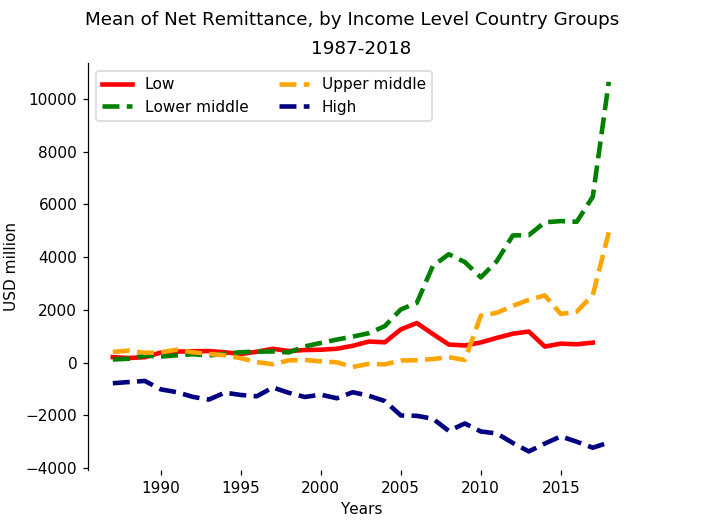

In [796]:
plt.rc('font', size=10)  # change font size        


fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(MeanClass.loc["L"],linewidth=3,label="Low",color="red")
plt.plot(MeanClass.loc["LM"],"--",linewidth=3,label="Lower middle",color="green")
plt.plot(MeanClass.loc["UM"],"--",linewidth=3,label="Upper middle",color="orange")
plt.plot(MeanClass.loc["H"],"--",linewidth=3,label="High",color="navy")
plt.suptitle("Mean of Net Remittance, by Income Level Country Groups")
plt.title("1987-2018")
plt.xlabel("Years")
plt.ylabel("USD million")
# to remove frame
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(ncol=2)
fig.show()

### Conclusion
Although low-income level countries are still net remittance receivers, considering the mean of net remittance, they appear to profit less from remittances, compared to low-middle income level and upper-middle income level countries.